Ryan: (maf) set to 0.05, minimum minor allele count (mac) set to
10, and minimum locus coverage (max-missing) set to 0.1. Only SNPs called in 100% of individuals; 2) SNPs with observed heterozygosity larger than 0.6 were removed to avoid paralogous loci in the dataset (Li et al.,
2014); 3) SNPs deviating from Hardy-Weinberg equilibrium (HWE, p-value < 0.01) in more
than one population were removed; 4) SNP pairs that showed linkage disequilibrium (LD) with r2> 0.2 were pruned

Bradburn: Call rates > 0.85, maf > 0.01 (or 0.05 in a pop)

In [6]:
vcf = "./maf05mac10het8m3R5r5_2/populations.snps.vcf"
suffix = "./maf05mac10het8m3R5r5_2/Making/"

In [21]:
%expand
module load vcftools/v0.1.17

vcftools --vcf {vcf} --recode --recode-INFO-all \
--min-alleles 2 \
--max-missing 0.9 \
--out {suffix}m90


VCFtools - 0.1.17
(C) Adam Auton and Anthony Marcketta 2009

Parameters as interpreted:
	--vcf ./maf05mac10het8m3R5r5_2/populations.snps.vcf
	--recode-INFO-all
	--min-alleles 2
	--max-missing 0.9
	--out ./maf05mac10het8m3R5r5_2/Making/m90
	--recode

After filtering, kept 144 out of 144 Individuals
Outputting VCF file...
After filtering, kept 12321 out of a possible 27568 Sites
Run Time = 11.00 seconds


In [22]:
%expand
vcftools --vcf {suffix}m90.recode.vcf --missing-indv --out {suffix}m90


VCFtools - 0.1.17
(C) Adam Auton and Anthony Marcketta 2009

Parameters as interpreted:
	--vcf ./maf05mac10het8m3R5r5_2/Making/m90.recode.vcf
	--missing-indv
	--out ./maf05mac10het8m3R5r5_2/Making/m90

After filtering, kept 144 out of 144 Individuals
Outputting Individual Missingness
After filtering, kept 12321 out of a possible 12321 Sites
Run Time = 2.00 seconds


In [23]:
%expand
cat {suffix}m90.imiss

INDV	N_DATA	N_GENOTYPES_FILTERED	N_MISS	F_MISS
ALL02	12321	0	284	0.0230501
ALL03	12321	0	3133	0.254281
ALL04	12321	0	155	0.0125801
ALL05	12321	0	239	0.0193978
ALL06	12321	0	303	0.0245922
ALL11	12321	0	60	0.00486973
ALL12	12321	0	130	0.0105511
ALLATOONA01	12321	0	140	0.0113627
ALLATOONA10	12321	0	191	0.015502
CANOT11829	12321	0	1097	0.089035
CANOT_11830	12321	0	205	0.0166383
CANOT_11832	12321	0	103	0.00835971
CANOT11837	12321	0	644	0.0522685
CANOT11838	12321	0	125	0.0101453
CANOT_2617	12321	0	394	0.0319779
DB12041	12321	0	2168	0.17596
DB2589	12321	0	723	0.0586803
DB2590	12321	0	128	0.0103888
DB_2592	12321	0	141	0.0114439
DB_2593	12321	0	1417	0.115007
DB2634	12321	0	721	0.058518
DB2635	12321	0	317	0.0257284
DB_2637	12321	0	64	0.00519438
FL01	12321	0	616	0.0499959
FL09	12321	0	791	0.0641993
FL12	12321	0	148	0.012012
FL15	12321	0	173	0.0140411
FL16	12321	0	187	0.0151773
FL20	12321	0	114	0.0092525
FL21	12321	0	240	0.0194789
FL23	12321	0	369	0.0299489
FL30	12321	0	113	0.00917133
FL55	12321	0

In [24]:
%expand
module load vcftools/v0.1.17
## Filtering out loci that depart HWE in at least 2 populations with a p-value cutoff of 0.05

../../../Scripts/filter_hwe_by_pop.pl -v {suffix}m90.recode.vcf \
-p ./NFLDB.location -h 0.05 -c 0.08 -o {suffix}m90-hwPbi

mv exclude.hwe exclude.txt
## remove intermediate files
rm *.inds
## Remove these if you don't want to inspect HWE results
rm *.hwe

Processing population: Big_Bayou_Canot (6 inds)
Processing population: DOlive_Bay (8 inds)
Processing population: FL_ASF (7 inds)
Processing population: FL_Bass_Cons (5 inds)
Processing population: Lake_Allatoona1 (5 inds)
Processing population: Lake_Allatoona2 (4 inds)
Processing population: Lake_Guntersville (10 inds)
Processing population: Lake_Harding (5 inds)
Processing population: Lake_Mattoon (10 inds)
Processing population: Lake_Otter (10 inds)
Processing population: Lamar_County_Lake (1 inds)
Processing population: Lay_Lake (9 inds)
Processing population: Mill_Creek (3 inds)
Processing population: Northern_ASF (6 inds)
Processing population: Reelfoot (4 inds)
Processing population: Reeves_Branch (5 inds)
Processing population: Rocky_Mt_PFA (5 inds)
Processing population: Sipsey_River (13 inds)
Processing population: St_Johns_River (17 inds)
Processing population: Sugar_Lake (9 inds)
Processing population: Tensaw_Lake (2 inds)
Outputting results of HWE test for filtered loci to

## All filtered SNPs (unlinked)

In [25]:
%expand
module load tabix/0.2.6
module load samtools/1.6
module load bcftools/1.3.2

cp {suffix}m90-hwPbi.recode.vcf {suffix}m90-hwPbicp.recode.vcf
vcf-sort {suffix}m90-hwPbicp.recode.vcf > {suffix}m90-hwPbicp.sorted.vcf
bgzip {suffix}m90-hwPbicp.sorted.vcf
tabix -p vcf {suffix}m90-hwPbicp.sorted.vcf.gz

sort -k1,1d -k2,2n


In [26]:
%expand
module load bcftools/1.3.2

bcftools +prune {suffix}m90-hwPbicp.sorted.vcf.gz -l 0.2 -n 1 -w 1000 \
-Ov -o {suffix}m90-hwPbi-thinned.vcf
grep -v "#" {suffix}m90-hwPbi-thinned.vcf | wc -l

7285


In [13]:
getwd()

[1] "/gpfs01/home/kes0132/Delta/Stacks_Assembly/MyStacks"

In [27]:
library(radiator)

In [15]:
%expand
setwd("{suffix}")

Execution date@time: 20191009@1348
Folder created: read_vcf_20191009@1348
Function call and arguments stored in: radiator_read_vcf_args_20191009@1348.tsv
File written: random.seed (524696)

Reading VCF
Data summary: 
    number of samples: 144
    number of markers: 7285
done! timing: 7 sec


File written: radiator_20191009@1348.gds

Analyzing the data...
VCF source: Stacks v2.4
Data is bi-allelic
Cleaning VCF's sample names
Synchronizing data and strata...
    Number of strata: 4
    Number of individuals: 144
Reads assembly: de novo
Filters parameters file generated: filters_parameters_20191009@1348.tsv
Filters parameters file: initiated and updated


################################################################################
########################### radiator::filter_monomorphic #######################
################################################################################


Execution date@time: 20191009@1348
Function call and arguments stored in: radiator_filter_monomorphic_args_20191009@1348.tsv
Filters parameters file: initiated
File written: whitelist.polymorphic.markers_20191009@1348.tsv
Filters parameters file: updated


################################### RESULTS ####################################



Filter monomorphic markers
Number of individuals / strata / chrom / locus / SNP:
    Before: 144 / 4 / 1 / 7285 / 7285
    Blacklisted: 0 / 0 / 0 / 0 / 0
    After: 144 / 4 / 1 / 7285 / 7285

Computation time, overall: 0 sec


######################## filter_monomorphic completed ##########################



Preparing output files...
File written: whitelist.markers.tsv
Writing the filtered strata: strata.filtered.tsvstrata.filtered.tsv

Generating statistics after filtering
Generating individual stats...


[==================================================] 100%, completed in 0s


File written: individuals qc info and stats summary
File written: individuals qc plot
Generating markers stats...


[==================================================] 100%, completed in 0s
[==================================================] 100%, completed in 0s
################################### SUMMARY ####################################




Summary (AFTER filtering):
Missing data: 
    markers: 0.04
    individuals: 0.04


Coverage info:
    individuals mean read depth: 85699
    individuals mean genotype coverage: 12
    markers mean coverage: 12


Number of chromosome/contig/scaffold: 1
Number of locus: 7285
Number of markers: 7285
Number of populations: 4
Number of individuals: 144

Number of ind/pop:
NB = 42
DB = 29
FL = 29
ILMB = 44

Number of duplicate id: 0
radiator Genomic Data Structure (GDS) file: radiator_20191009@1348.gds

Computation time, overall: 14 sec


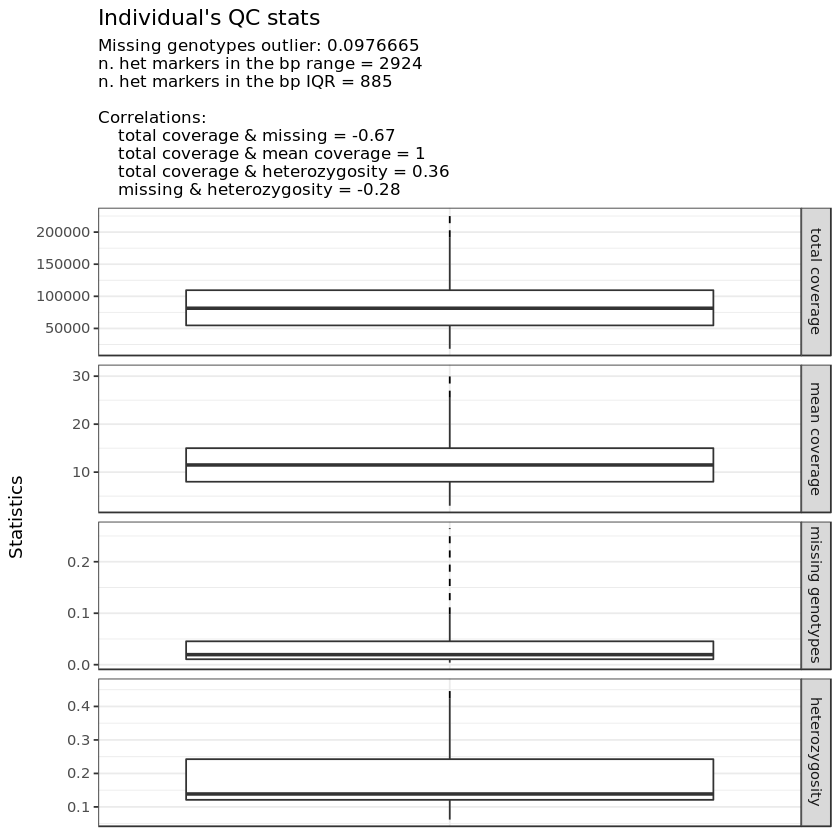

############################## completed read_vcf ##############################


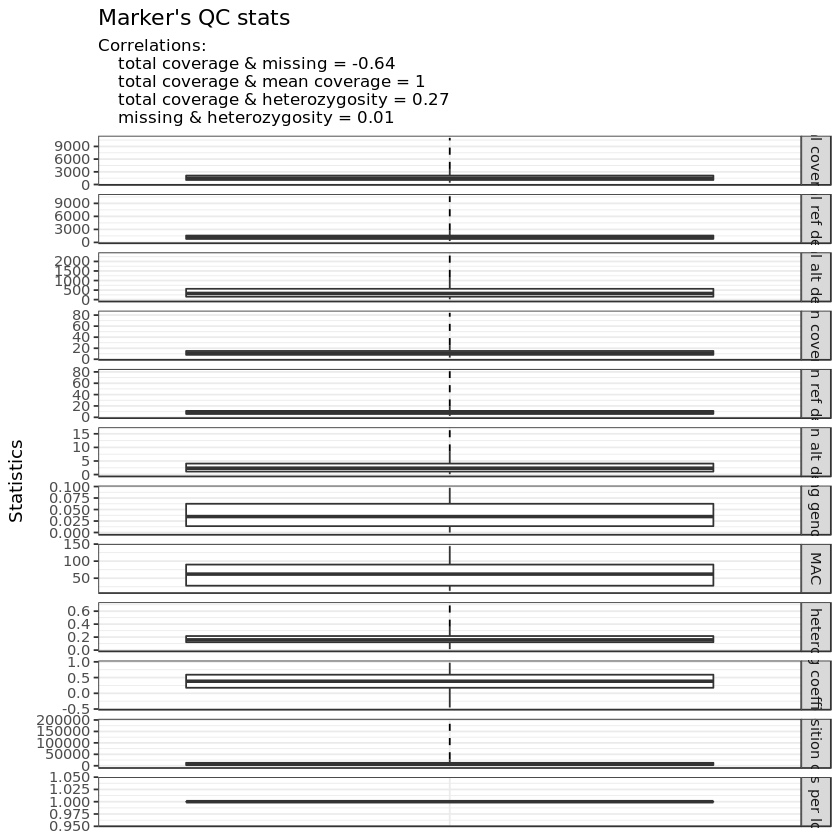

In [28]:
%expand
data = read_vcf("m90-hwPbi-thinned.vcf", strata = "../../NFLDB.strata",
        vcf.stats = TRUE, parallel.core = 1, filter.common.markers = F,pop.levels=c("NB","DB","FL","ILMB"))


In [29]:
outs = genomic_converter(data, strata="../../NFLDB.strata", 
                  output = c("genind","structure"),
                 parallel.core = 4, filename = "P3-allfiltu", pop.levels=c("NB","DB","FL","ILMB"))

################################################################################
########################## radiator::genomic_converter #########################
################################################################################


Execution date@time: 20191009@1349

Deprecated arguments identified inside "...": 
    pop.levels

Read documentation, for latest changes, and modify your codes!

Folder created: 03_radiator_genomic_converter_20191009@1349
Function call and arguments stored in: radiator_genomic_converter_args_20191009@1349.tsv
Filters parameters file generated: filters_parameters_20191009@1349.tsv

Importing data

Synchronizing data and strata...
    Number of strata: 4
    Number of individuals: 144

Writing tidy data set:
P3-allfiltu.rad

Preparing data for output

Data is bi-allelic
Calibrating REF/ALT alleles...
    number of REF/ALT switch = 3
Generating structure file
Generating adegenet genind object


################################### RESULTS ####################################


Data format of input: SeqVarGDSClass
Biallelic data
Number of markers: 7285
Number of chromosome/contig/scaffold: 1
Number of strata: 4
Number of individuals: 144

Computation time, overall: 51 sec


######################### genomic_converter completed ##########################


In [30]:
outs$genind

/// GENIND OBJECT /////////

 // 144 individuals; 7,285 loci; 14,570 alleles; size: 12.2 Mb

 // Basic content
   @tab:  144 x 14570 matrix of allele counts
   @loc.n.all: number of alleles per locus (range: 2-2)
   @loc.fac: locus factor for the 14570 columns of @tab
   @all.names: list of allele names for each locus
   @ploidy: ploidy of each individual  (range: 2-2)
   @type:  codom
   @call: radiator::write_genind(data = input, write = TRUE)

 // Optional content
   @pop: population of each individual (group size range: 29-44)
   @strata: a data frame with 2 columns ( INDIVIDUALS, POP_ID )

In [31]:
allfiltu = outs$genind
save(allfiltu, file="P3-allfiltu.genind")

## Fixed within at least 2 pops

In [164]:
import pandas as pd
infile ="./maf05mac4het9m3R50_2/populations.sumstats.tsv"

IN = pd.read_table(infile,header=4)

In [165]:
IN.dtypes

# Locus ID                int64
Chr                       int64
BP                        int64
Col                       int64
Pop ID                   object
P Nuc                    object
Q Nuc                    object
N                         int64
P                       float64
Obs Het                 float64
Obs Hom                 float64
Exp Het                 float64
Exp Hom                 float64
Pi                      float64
Smoothed Pi             float64
Smoothed Pi P-value     float64
Fis                     float64
Smoothed Fis            float64
Smoothed Fis P-value    float64
HWE P-value             float64
Private                   int64
dtype: object

In [166]:
filt = IN[["# Locus ID","Pop ID","P","Obs Het","Private"]]

In [167]:
filt.iloc[0:5]

,# Locus ID,Pop ID,P,Obs Het,Private
0,127,ILMB,0.625000,0.36111,0
1,127,DB,0.379310,0.34483,0
2,127,NB,0.646341,0.41463,0
3,178,ILMB,0.845238,0.30952,0
4,178,DB,0.948276,0.10345,0


In [168]:
fixed = filt[filt['P'] ==1.0]
floc = set(fixed['# Locus ID'].tolist())
f = filt[filt['# Locus ID'].isin(floc)]

In [169]:
len(floc)

25835

In [170]:
goodLoc =[]
for loc in floc:
    for row in f[f['# Locus ID'] == loc].itertuples(index=True):
        if row.P < 0.03:
            goodLoc.append(row._1)


In [171]:
len(set(goodLoc))

6471

In [172]:
x = IN[IN['# Locus ID'].isin(goodLoc)]

In [185]:
%expand
positions = []
OUT = open("{suffix}fixed.positions","w")
OUTr = open("{suffix}fixed_R.positions","w")
OUTr.write("LOCUS\tPOS\n")
n=0
for row in x.itertuples(index=True):
    if (row.Chr, row.BP) not in positions:
        positions.append((row.Chr, row.BP))
        OUT.write(str(row.Chr)+"\t"+str(row.BP)+"\n")
        OUTr.write(str(row.Chr)+"\t"+str(row.BP)+"\n")
        n+=1
OUT.close()
OUTr.close()
print(n)

8464


In [12]:
%expand
module load vcftools/v0.1.17

vcftools --vcf {suffix}m85-hwPbi.recode.vcf --recode \
--recode-INFO-all --positions {suffix}fixed.positions \
--out {suffix}m85-hwPBi-fixed


VCFtools - 0.1.17
(C) Adam Auton and Anthony Marcketta 2009

Parameters as interpreted:
	--vcf ./maf05mac4het9m3R50_2/Making/m85-hwPbi.recode.vcf
	--recode-INFO-all
	--out ./maf05mac4het9m3R50_2/Making/m85-hwPBi-fixed
	--positions ./maf05mac4het9m3R50_2/Making/fixed.positions
	--recode

After filtering, kept 144 out of 144 Individuals
Outputting VCF file...
After filtering, kept 3937 out of a possible 15078 Sites
Run Time = 4.00 seconds


Execution date@time: 20190926@1402
Folder created: read_vcf_20190926@1402
Function call and arguments stored in: radiator_read_vcf_args_20190926@1402.tsv
File written: random.seed (482548)

Reading VCF
Data summary: 
    number of samples: 144
    number of markers: 3937
done! timing: 3 sec


File written: radiator_20190926@1402.gds

Analyzing the data...
VCF source: Stacks v2.4
Data is bi-allelic
Cleaning VCF's sample names
Synchronizing data and strata...
    Number of strata: 4
    Number of individuals: 144
Reads assembly: de novo
Filters parameters file generated: filters_parameters_20190926@1402.tsv
Filters parameters file: initiated and updated


################################################################################
########################### radiator::filter_monomorphic #######################
################################################################################


Execution date@time: 20190926@1402
Function call and arguments stored in: radiator_filter_monomorphic_args_20190926@1402.tsv
Filters parameters file: initiated
File written: whitelist.polymorphic.markers_20190926@1402.tsv
Filters parameters file: updated


################################### RESULTS ####################################



Filter monomorphic markers
Number of individuals / strata / chrom / locus / SNP:
    Before: 144 / 4 / 1 / 2229 / 3937
    Blacklisted: 0 / 0 / 0 / 0 / 0
    After: 144 / 4 / 1 / 2229 / 3937

Computation time, overall: 0 sec


######################## filter_monomorphic completed ##########################



Preparing output files...
File written: whitelist.markers.tsv
Writing the filtered strata: strata.filtered.tsvstrata.filtered.tsv

Generating statistics after filtering
Generating individual stats...
File written: individuals qc info and stats summary
File written: individuals qc plot
Generating markers stats...


################################### SUMMARY ####################################




Summary (AFTER filtering):
Missing data: 
    markers: 0.06
    individuals: 0.06


Coverage info:
    individuals mean read depth: 41006
    individuals mean genotype coverage: 11
    markers mean coverage: 11


Number of chromosome/contig/scaffold: 1
Number of locus: 2229
Number of markers: 3937
Number of populations: 4
Number of individuals: 144

Number of ind/pop:
ILMB = 44
DB = 29
FL = 29
NB = 42

Number of duplicate id: 0
radiator Genomic Data Structure (GDS) file: radiator_20190926@1402.gds

Computation time, overall: 10 sec


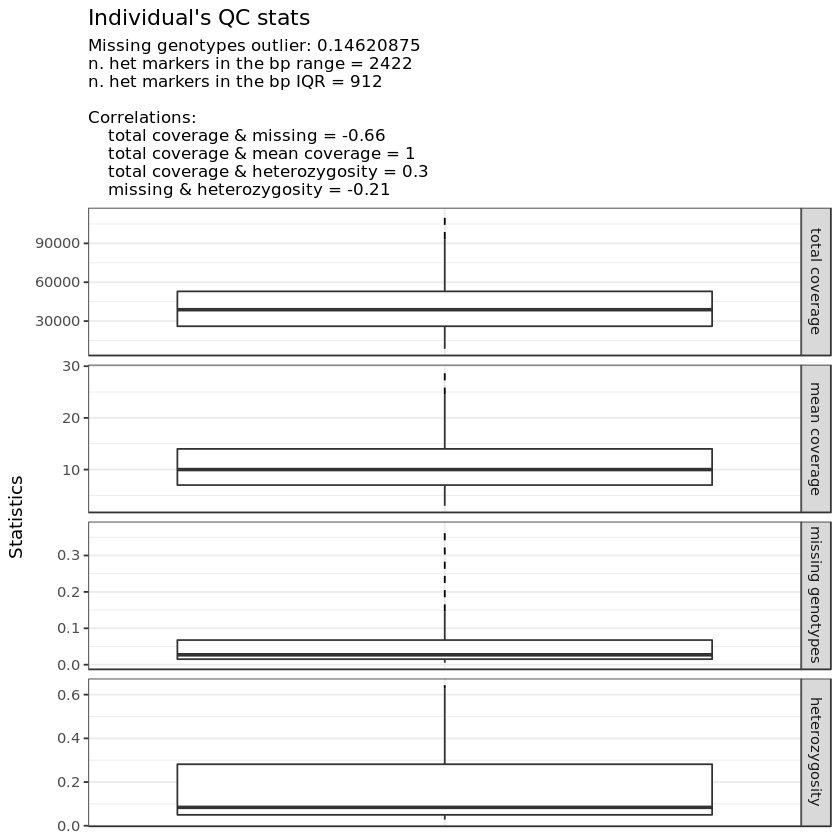

############################## completed read_vcf ##############################


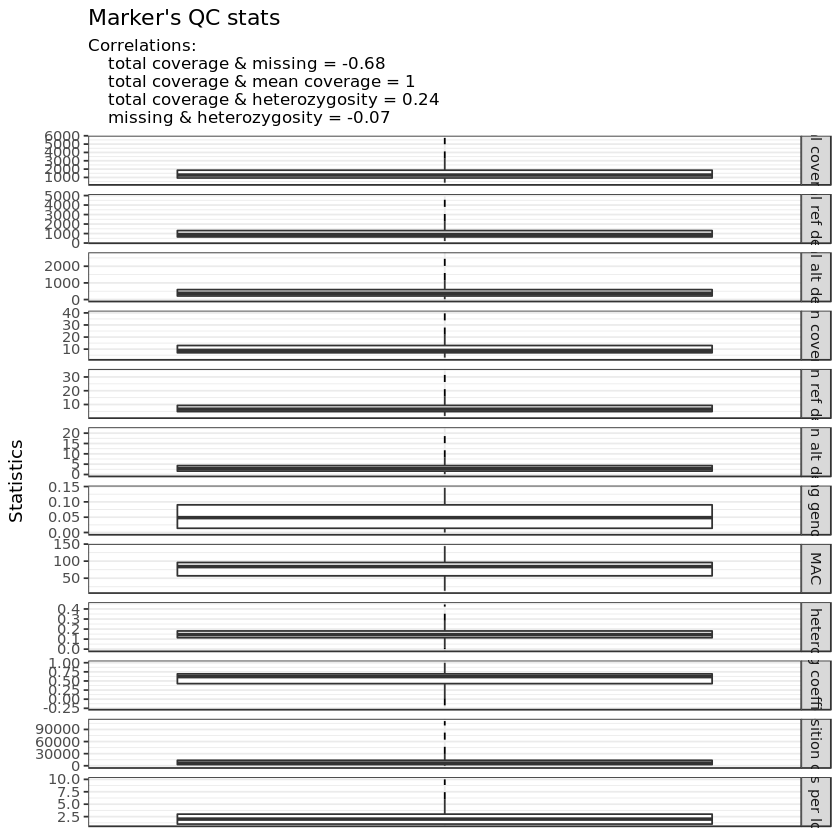

In [23]:
%expand
data = read_vcf("m85-hwPBi-fixed.recode.vcf", strata = "../../NFLDB.strata",
        vcf.stats = TRUE, parallel.core = 4, filter.common.markers = F)


In [ ]:
#dataLD = filter_ld(data, interactive.filter = F, filter.short.ld = "mac",
#  filter.long.ld = 0.7, parallel.core = 4, long.ld.missing = TRUE,
#  filename = "filtered_hwld")

In [ ]:
genomic_converter(dataLD, strata="../../NFLDB.strata", 
                  output = c("genind","structure","vcf"),
                 parallel.core = 4, filename = "hwp3t1ld7")

In [178]:
%expand
module load tabix/0.2.6
module load samtools/1.6

bgzip {suffix}m85-hwPBi-fixed.recode.vcf 
tabix -p vcf {suffix}m85-hwPBi-fixed.recode.vcf.gz

In [179]:
%expand
module load bcftools/1.3.2

bcftools +prune {suffix}m85-hwPBi-fixed.recode.vcf.gz -l 0.2 -n 1 -w 10000 \
-Ov -o {suffix}m85-hwPBi-fixed-thinned.vcf
grep -v "#" {suffix}m85-hwPBi-fixed-thinned.vcf | wc -l

2229


Execution date@time: 20191007@1129
Folder created: read_vcf_20191007@1129
Function call and arguments stored in: radiator_read_vcf_args_20191007@1129.tsv
File written: random.seed (661011)

Reading VCF
Data summary: 
    number of samples: 144
    number of markers: 2229
done! timing: 6 sec


File written: radiator_20191007@1129.gds

Analyzing the data...
VCF source: Stacks v2.4
Data is bi-allelic
Cleaning VCF's sample names
Synchronizing data and strata...
    Number of strata: 4
    Number of individuals: 144
Reads assembly: de novo
Filters parameters file generated: filters_parameters_20191007@1129.tsv
Filters parameters file: initiated and updated


################################################################################
########################### radiator::filter_monomorphic #######################
################################################################################


Execution date@time: 20191007@1129
Function call and arguments stored in: radiator_filter_monomorphic_args_20191007@1129.tsv
Filters parameters file: initiated
File written: whitelist.polymorphic.markers_20191007@1129.tsv
Filters parameters file: updated


################################### RESULTS ####################################



Filter monomorphic markers
Number of individuals / strata / chrom / locus / SNP:
    Before: 144 / 4 / 1 / 2229 / 2229
    Blacklisted: 0 / 0 / 0 / 0 / 0
    After: 144 / 4 / 1 / 2229 / 2229

Computation time, overall: 0 sec


######################## filter_monomorphic completed ##########################



Preparing output files...
File written: whitelist.markers.tsv
Writing the filtered strata: strata.filtered.tsvstrata.filtered.tsv

Generating statistics after filtering
Generating individual stats...
File written: individuals qc info and stats summary
File written: individuals qc plot
Generating markers stats...


################################### SUMMARY ####################################




Summary (AFTER filtering):
Missing data: 
    markers: 0.06
    individuals: 0.06


Coverage info:
    individuals mean read depth: 23028
    individuals mean genotype coverage: 11
    markers mean coverage: 11


Number of chromosome/contig/scaffold: 1
Number of locus: 2229
Number of markers: 2229
Number of populations: 4
Number of individuals: 144

Number of ind/pop:
NB = 42
DB = 29
FL = 29
ILMB = 44

Number of duplicate id: 0
radiator Genomic Data Structure (GDS) file: radiator_20191007@1129.gds

Computation time, overall: 19 sec


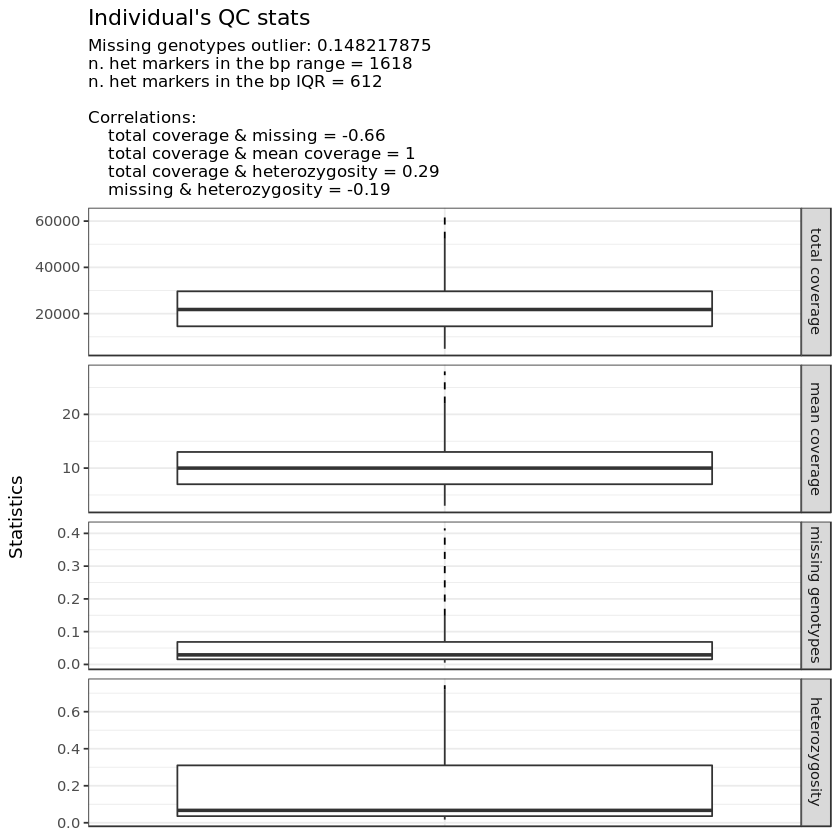

############################## completed read_vcf ##############################


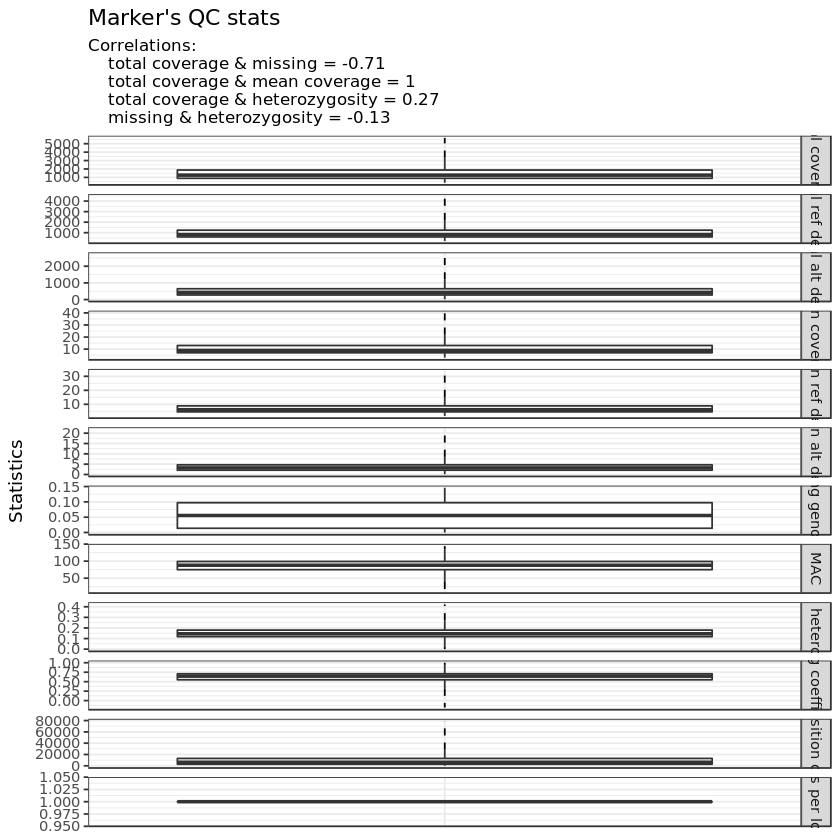

In [11]:
data = read_vcf("m85-hwPBi-fixed-thinned.vcf", strata = "../../NFLDB.strata",
        vcf.stats = TRUE, parallel.core = 4, filter.common.markers = F,pop.levels=c("NB","DB","FL","ILMB"))


In [12]:
outs = genomic_converter(data, strata="../../NFLDB.strata", 
                  output = c("genind","structure","vcf"),
                 parallel.core = 4, filename = "fixedu",pop.levels=c("NB","DB","FL","ILMB") )

################################################################################
########################## radiator::genomic_converter #########################
################################################################################


Execution date@time: 20191007@1130

Deprecated arguments identified inside "...": 
    pop.levels

Read documentation, for latest changes, and modify your codes!

Folder created: 05_radiator_genomic_converter_20191007@1130
Function call and arguments stored in: radiator_genomic_converter_args_20191007@1130.tsv
Filters parameters file generated: filters_parameters_20191007@1130.tsv

Importing data

Synchronizing data and strata...
    Number of strata: 4
    Number of individuals: 144

Writing tidy data set:
fixedu.rad

Preparing data for output

Data is bi-allelic
Calibrating REF/ALT alleles...
    number of REF/ALT switch = 2
Generating structure file
Generating adegenet genind object
Generating VCF file


################################### RESULTS ####################################


Data format of input: SeqVarGDSClass
Biallelic data
Number of markers: 2229
Number of chromosome/contig/scaffold: 1
Number of strata: 4
Number of individuals: 144

Computation time, overall: 17 sec


######################### genomic_converter completed ##########################


In [13]:
outs$genind

/// GENIND OBJECT /////////

 // 144 individuals; 2,229 loci; 4,458 alleles; size: 3.8 Mb

 // Basic content
   @tab:  144 x 4458 matrix of allele counts
   @loc.n.all: number of alleles per locus (range: 2-2)
   @loc.fac: locus factor for the 4458 columns of @tab
   @all.names: list of allele names for each locus
   @ploidy: ploidy of each individual  (range: 2-2)
   @type:  codom
   @call: radiator::write_genind(data = input, write = TRUE)

 // Optional content
   @pop: population of each individual (group size range: 29-44)
   @strata: a data frame with 2 columns ( INDIVIDUALS, POP_ID )

In [14]:
d = outs$genind
save(d, file="fixedu.genind")

### Top markers based on PCA

In [46]:
%expand
module load vcftools/v0.1.17

vcftools --vcf {suffix}m85-hwPBi-fixed-thinned.vcf --recode \
--recode-INFO-all --positions {suffix}../Analysis/pc12_95.positions \
--out {suffix}../Analysis/pc12_95-fixed


VCFtools - 0.1.17
(C) Adam Auton and Anthony Marcketta 2009

Parameters as interpreted:
	--vcf ./maf05mac4het9m3R50_2/Making/m85-hwPBi-fixed-thinned.vcf
	--recode-INFO-all
	--out ./maf05mac4het9m3R50_2/Making/../Analysis/pc12_95-fixed
	--positions ./maf05mac4het9m3R50_2/Making/../Analysis/pc12_95.positions
	--recode

After filtering, kept 144 out of 144 Individuals
Outputting VCF file...
After filtering, kept 218 out of a possible 2229 Sites
Run Time = 1.00 seconds


In [47]:
getwd()

[1] "/gpfs01/home/kes0132/Delta/Stacks_Assembly/MyStacks/maf05mac4het9m3R50_2/Making"

Execution date@time: 20191007@1133
Folder created: read_vcf_20191007@1133
Function call and arguments stored in: radiator_read_vcf_args_20191007@1133.tsv
File written: random.seed (542535)

Reading VCF
Data summary: 
    number of samples: 144
    number of markers: 218
done! timing: 1 sec


File written: radiator_20191007@1133.gds

Analyzing the data...
VCF source: Stacks v2.4
Data is bi-allelic
Cleaning VCF's sample names
Synchronizing data and strata...
    Number of strata: 4
    Number of individuals: 144
Reads assembly: de novo
Filters parameters file generated: filters_parameters_20191007@1133.tsv
Filters parameters file: initiated and updated


################################################################################
########################### radiator::filter_monomorphic #######################
################################################################################


Execution date@time: 20191007@1133
Function call and arguments stored in: radiator_filter_monomorphic_args_20191007@1133.tsv
Filters parameters file: initiated
File written: whitelist.polymorphic.markers_20191007@1133.tsv
Filters parameters file: updated


################################### RESULTS ####################################



Filter monomorphic markers
Number of individuals / strata / chrom / locus / SNP:
    Before: 144 / 4 / 1 / 218 / 218
    Blacklisted: 0 / 0 / 0 / 0 / 0
    After: 144 / 4 / 1 / 218 / 218

Computation time, overall: 0 sec


######################## filter_monomorphic completed ##########################



Preparing output files...
File written: whitelist.markers.tsv
Writing the filtered strata: strata.filtered.tsvstrata.filtered.tsv

Generating statistics after filtering
Generating individual stats...
File written: individuals qc info and stats summary
File written: individuals qc plot
Generating markers stats...


################################### SUMMARY ####################################




Summary (AFTER filtering):
Missing data: 
    markers: 0.02
    individuals: 0.02


Coverage info:
    individuals mean read depth: 3229
    individuals mean genotype coverage: 15
    markers mean coverage: 15


Number of chromosome/contig/scaffold: 1
Number of locus: 218
Number of markers: 218
Number of populations: 4
Number of individuals: 144

Number of ind/pop:
NB = 42
DB = 29
FL = 29
ILMB = 44

Number of duplicate id: 0
radiator Genomic Data Structure (GDS) file: radiator_20191007@1133.gds

Computation time, overall: 6 sec


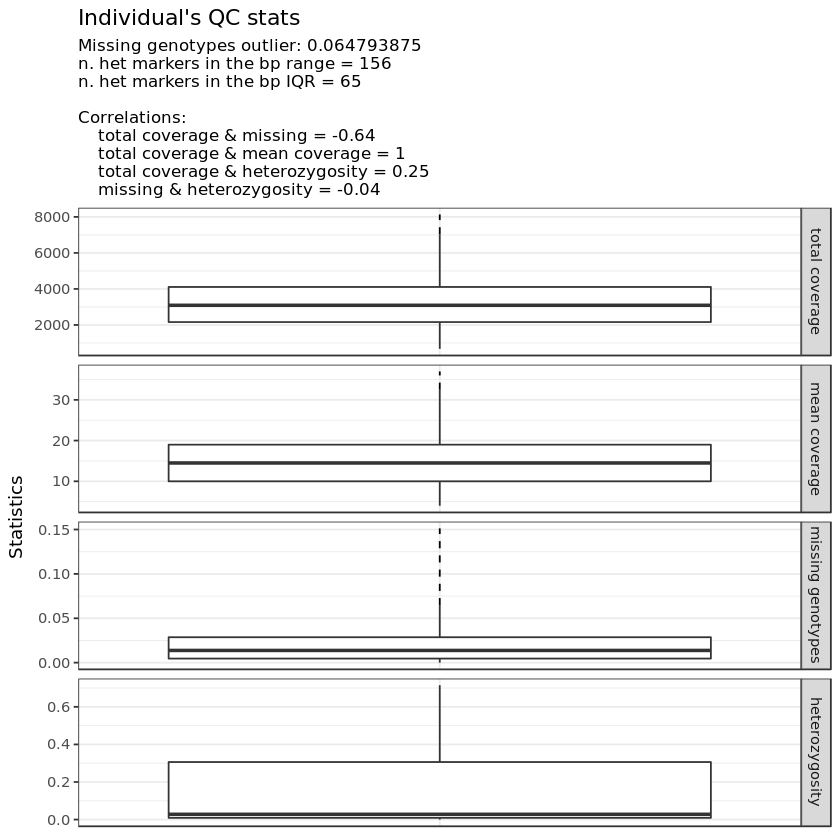

############################## completed read_vcf ##############################


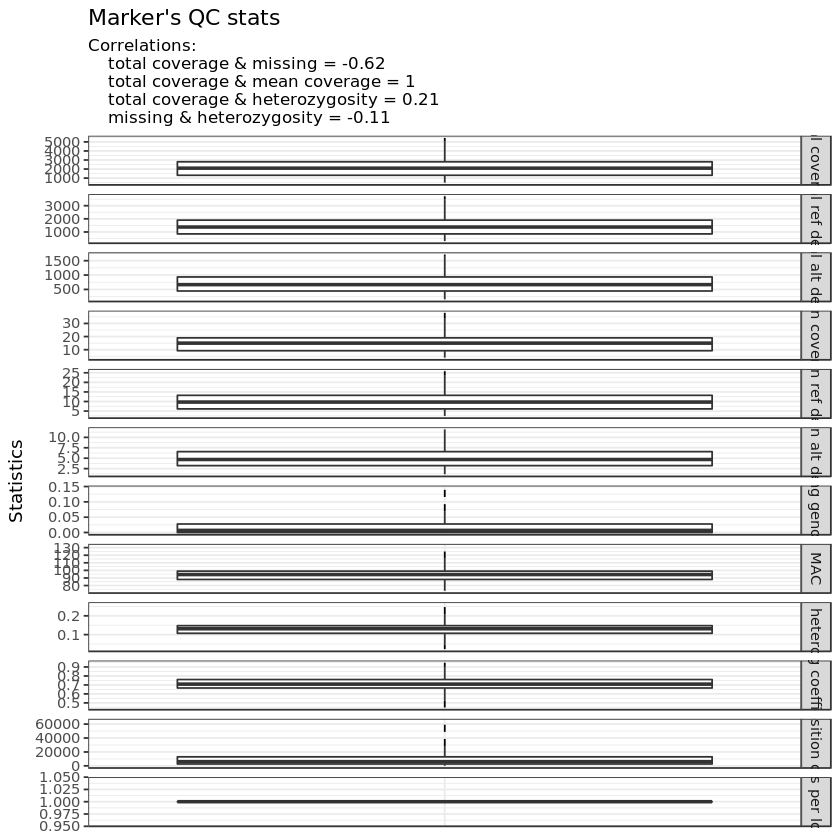

In [16]:
%expand
data = read_vcf("../Analysis/pc12_95-fixed/pc12_95-fixed.recode.vcf", strata = "../../NFLDB.strata",
        vcf.stats = TRUE, parallel.core = 4, filter.common.markers = F, pop.levels=c("NB","DB","FL","ILMB") )


In [17]:
outs = genomic_converter(data, strata="../../NFLDB.strata", 
                  output = c("genind","structure"),
                 parallel.core = 4, filename = "pc12_95-fixed",pop.levels=c("NB","DB","FL","ILMB"))

################################################################################
########################## radiator::genomic_converter #########################
################################################################################


Execution date@time: 20191007@1134

Deprecated arguments identified inside "...": 
    pop.levels

Read documentation, for latest changes, and modify your codes!

Folder created: 08_radiator_genomic_converter_20191007@1134
Function call and arguments stored in: radiator_genomic_converter_args_20191007@1134.tsv
Filters parameters file generated: filters_parameters_20191007@1134.tsv

Importing data

Synchronizing data and strata...
    Number of strata: 4
    Number of individuals: 144

Writing tidy data set:
pc12_95-fixed.rad

Preparing data for output

Data is bi-allelic
Calibrating REF/ALT alleles...
    number of REF/ALT switch = 0
Generating structure file
Generating adegenet genind object


################################### RESULTS ####################################


Data format of input: SeqVarGDSClass
Biallelic data
Number of markers: 218
Number of chromosome/contig/scaffold: 1
Number of strata: 4
Number of individuals: 144

Computation time, overall: 2 sec


######################### genomic_converter completed ##########################


In [18]:
outs$genind

/// GENIND OBJECT /////////

 // 144 individuals; 218 loci; 436 alleles; size: 410.1 Kb

 // Basic content
   @tab:  144 x 436 matrix of allele counts
   @loc.n.all: number of alleles per locus (range: 2-2)
   @loc.fac: locus factor for the 436 columns of @tab
   @all.names: list of allele names for each locus
   @ploidy: ploidy of each individual  (range: 2-2)
   @type:  codom
   @call: radiator::write_genind(data = input, write = TRUE)

 // Optional content
   @pop: population of each individual (group size range: 29-44)
   @strata: a data frame with 2 columns ( INDIVIDUALS, POP_ID )

In [19]:
d = outs$genind
save(d, file="../Analysis/pc12_95-fixed/pc12_95-fixed.genind")

## Structure file with pure references


In [3]:
%expand
#don't need
purefile = open("{suffix}../Analysis/Pure_NFLDB.tsv","r")
str_in = open("{suffix}../Analysis/allfiltu/allfiltu_pflag.str","r")
str_out = open("{suffix}../Analysis/allfiltu/allfiltu_pflagPureB.str","w")

keep = []
next(purefile)
next(purefile)
for line in purefile:
    keep.append(line.split("\t")[0])
purefile.close()

str_out.write(str_in.readline())
for line in str_in:
    stuff = line.split("\t")
    if stuff[0] not in keep:
        stuff[2] = "0"
        if stuff[1] == "1":
            stuff[1] = "5"
        if stuff[1] == "2":
            stuff[1] = "6"
        if stuff[1] == "3":
            stuff[1] = "7"
    else:
        stuff[2] = "1"
    str_out.write("\t".join(stuff))

str_in.close()
str_out.close()

In [5]:
%expand
#don't need
purefile = open("{suffix}../Analysis/Pure_NFLDB.tsv","r")
str_in = open("{suffix}../Analysis/pc12_95-fixed/pc12_95-fixed_pflag.str","r")
str_out = open("{suffix}../Analysis/pc12_95-fixed/pc12_95-fixed_pflagPureB.str","w")

keep = []
next(purefile)
next(purefile)
for line in purefile:
    keep.append(line.split("\t")[0])
purefile.close()

str_out.write(str_in.readline())
for line in str_in:
    stuff = line.split("\t")
    if stuff[0] not in keep:
        stuff[2] = "0"
        if stuff[1] == "1":
            stuff[1] = "5"
        if stuff[1] == "2":
            stuff[1] = "6"
        if stuff[1] == "3":
            stuff[1] = "7"
    else:
        stuff[2] = "1"
    str_out.write("\t".join(stuff))

str_in.close()
str_out.close()

In [22]:
%expand
purefile = open("{suffix}../Analysis/Pure_NFLDB.tsv","r")
str_in = open("{suffix}../Analysis/fixed-thinned/fixedu_pflag.str","r")
str_out = open("{suffix}../Analysis/fixed-thinned/fixedu_pflagPure.str","w")

keep = []
next(purefile)
next(purefile)
for line in purefile:
    keep.append(line.split("\t")[0])
purefile.close()

str_out.write(str_in.readline())
for line in str_in:
    stuff = line.split("\t")
    if stuff[0] not in keep:
        stuff[2] = "0"
    else:
        stuff[2] = "1"
    str_out.write("\t".join(stuff))

str_in.close()
str_out.close()

In [6]:
%expand
purefile = open("{suffix}../Analysis/Pure_NFLDB.tsv","r")
str_in = open("{suffix}../Analysis/pc12_95-fixed/pc12_95-fixed_pflag.str","r")
str_out = open("{suffix}../Analysis/pc12_95-fixed/pc12_95-fixed_pflagPure.str","w")

keep = []
next(purefile)
next(purefile)
for line in purefile:
    keep.append(line.split("\t")[0])
purefile.close()

str_out.write(str_in.readline())
for line in str_in:
    stuff = line.split("\t")
    if stuff[0] not in keep:
        stuff[2] = "0"
    else:
        stuff[2] = "1"
    str_out.write("\t".join(stuff))

str_in.close()
str_out.close()

In [21]:
keep

['CANOT-11830',
 'CANOT-11832',
 'CANOT-2617',
 'CANOT11829',
 'CANOT11837',
 'CANOT11838',
 'DB-2592',
 'DB-2593',
 'DB-2637',
 'DB12041',
 'DB2589',
 'DB2590',
 'DB2634',
 'DB2635',
 'SIPS-26',
 'TN11851',
 'TN11855',
 'FL01',
 'FL09',
 'FL12',
 'FL15',
 'FL16',
 'FL20',
 'FL21',
 'FL23',
 'FL30',
 'FL55',
 'FL60',
 'FL64',
 'FL68',
 'FL70',
 'FL71',
 'FL72',
 'FL73',
 'FLAL01',
 'FLAL01II',
 'FLAL02',
 'FLAL02II',
 'FLAL03',
 'FLAL03',
 'FLAL04',
 'FLAL04II',
 'FLF17',
 'FLM10',
 'FLM12',
 'FLM13',
 'FLM15',
 'MATT-01',
 'MATT-02',
 'MATT-06',
 'Mill-18',
 'NB11',
 'NB12',
 'NB13',
 'NB19',
 'NBM01',
 'Otter-13',
 'Otter-4',
 'SL04',
 'SL10',
 'SL11',
 'SL14',
 'SL15',
 'SL16',
 'SL19',
 'SL2',
 'SL8']

## Fixed within all pops

In [164]:
import pandas as pd
infile ="./maf05mac4het9m3R50_2/populations.sumstats.tsv"

IN = pd.read_table(infile,header=4)

In [165]:
IN.dtypes

# Locus ID                int64
Chr                       int64
BP                        int64
Col                       int64
Pop ID                   object
P Nuc                    object
Q Nuc                    object
N                         int64
P                       float64
Obs Het                 float64
Obs Hom                 float64
Exp Het                 float64
Exp Hom                 float64
Pi                      float64
Smoothed Pi             float64
Smoothed Pi P-value     float64
Fis                     float64
Smoothed Fis            float64
Smoothed Fis P-value    float64
HWE P-value             float64
Private                   int64
dtype: object

In [166]:
filt = IN[["# Locus ID","Pop ID","P","Obs Het","Private"]]

In [167]:
filt.iloc[0:5]

,# Locus ID,Pop ID,P,Obs Het,Private
0,127,ILMB,0.625000,0.36111,0
1,127,DB,0.379310,0.34483,0
2,127,NB,0.646341,0.41463,0
3,178,ILMB,0.845238,0.30952,0
4,178,DB,0.948276,0.10345,0


In [168]:
fixed = filt[filt['P'] ==1.0]
floc = set(fixed['# Locus ID'].tolist())
f = filt[filt['# Locus ID'].isin(floc)]

In [169]:
len(floc)

25835

In [170]:
goodLoc =[]
for loc in floc:
    for row in f[f['# Locus ID'] == loc].itertuples(index=True):
        if row.P < 0.03:
            goodLoc.append(row._1)


In [171]:
len(set(goodLoc))

6471

In [172]:
x = IN[IN['# Locus ID'].isin(goodLoc)]

In [185]:
%expand
positions = []
OUT = open("{suffix}fixed.positions","w")
OUTr = open("{suffix}fixed_R.positions","w")
OUTr.write("LOCUS\tPOS\n")
n=0
for row in x.itertuples(index=True):
    if (row.Chr, row.BP) not in positions:
        positions.append((row.Chr, row.BP))
        OUT.write(str(row.Chr)+"\t"+str(row.BP)+"\n")
        OUTr.write(str(row.Chr)+"\t"+str(row.BP)+"\n")
        n+=1
OUT.close()
OUTr.close()
print(n)

8464


### Making inputs in R

In [2]:
getwd()

[1] "/gpfs01/home/kes0132/Delta/Stacks_Assembly/MyStacks"

In [152]:
library("adegenet") # .genind format
library("radiator") # Conversion from vcf to a lot of other formats

ERROR: Error in library("adegenet"): there is no package called 'adegenet'


In [2]:
%expand
setwd("{suffix}")
library(radiator)
library(adegenet)

Loading required package: ade4

   /// adegenet 2.1.1 is loaded ////////////

   > overview: '?adegenet'
   > tutorials/doc/questions: 'adegenetWeb()' 
   > bug reports/feature requests: adegenetIssues()




In [ ]:
%expand
setwd("{suffix}")
data <- radiator::filter_rad(
    data = "./maf05mac4het9m3R50_2/populations.snps.vcf",
    strata = "../../NFLDB.strata", 
    output = c("genind")
    )

In [ ]:
whitelist.markers = "fixed_R.positions",

Execution date@time: 20190926@1205
Folder created: read_vcf_20190926@1205
Function call and arguments stored in: radiator_read_vcf_args_20190926@1205.tsv
File written: random.seed (246505)

Reading VCF
Data summary: 
    number of samples: 144
    number of markers: 4995
done! timing: 3 sec


File written: filtered_20190926@1205.gds

Analyzing the data...
VCF source: Stacks v2.4
Data is bi-allelic
Cleaning VCF's sample names
Synchronizing data and strata...
    Number of strata: 4
    Number of individuals: 144
Reads assembly: de novo
Filters parameters file generated: filters_parameters_20190926@1205.tsv
Filters parameters file: initiated and updated


################################################################################
########################### radiator::filter_monomorphic #######################
################################################################################


Execution date@time: 20190926@1205
Function call and arguments stored in: radiator_filter_monomorphic_args_20190926@1205.tsv
Filters parameters file: initiated
File written: whitelist.polymorphic.markers_20190926@1205.tsv
Filters parameters file: updated


################################### RESULTS ####################################



Filter monomorphic markers
Number of individuals / strata / chrom / locus / SNP:
    Before: 144 / 4 / 1 / 2622 / 4995
    Blacklisted: 0 / 0 / 0 / 0 / 0
    After: 144 / 4 / 1 / 2622 / 4995

Computation time, overall: 0 sec


######################## filter_monomorphic completed ##########################
################################################################################
######################### radiator::filter_genotyping ##########################
################################################################################


Execution date@time: 20190926@1205
Function call and arguments stored in: radiator_filter_genotyping_args_20190926@1205.tsv
Importing data ...
Filters parameters file: initiated
Generating statistics
Generating missingness/genotyping helper table...


ERROR: Error in is_missing(.key): object 'id.select' not found



Computation time, overall: 1 sec


######################## completed filter_genotyping ###########################



Computation time, overall: 4 sec


############################## completed read_vcf ##############################


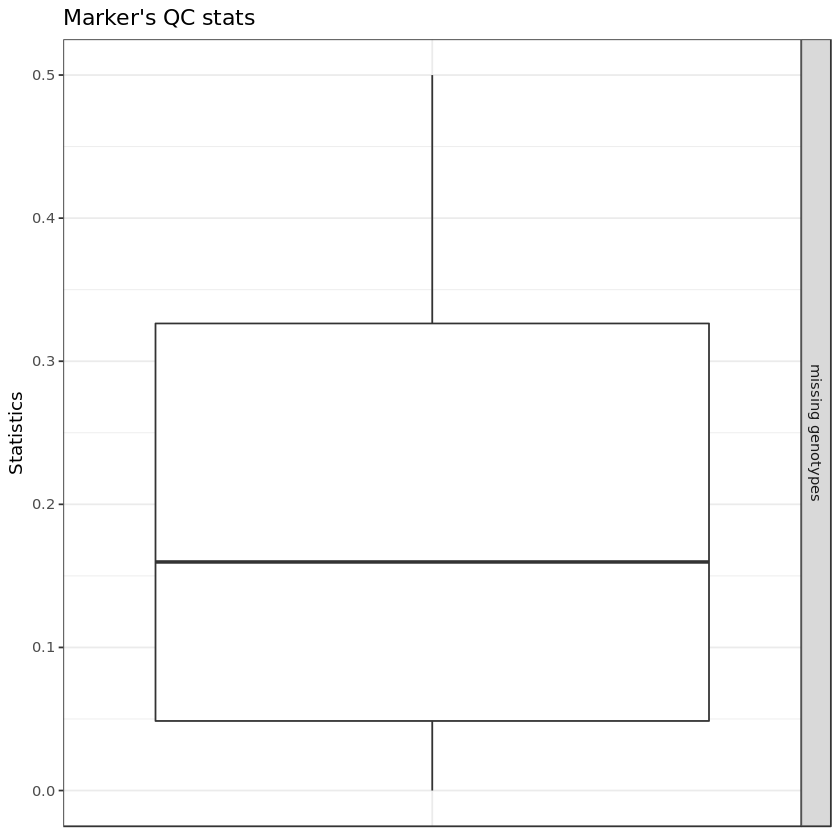

In [11]:
%expand
data = read_vcf("../../Silliman_subset//sub_populations.snps.vcf", strata = "../../NFLDB.strata",
        vcf.stats = TRUE, 
  parallel.core = 4, filter.common.markers = F, filter.genotyping = 15, filename= "filtered")


In [ ]:
dataHW = filter_hwe(data,interactive.filter=F, strata= "../../NFLDB.location.strata"
                   hw.pop.threshold=3, midp.threshold = 1, parallel.core = 4, 
                    filename="filtered_hwe")

In [ ]:
dataHWLD = filter_ld(dataHW, interactive.filter = F, filter.short.ld = "mac",
  filter.long.ld = 0.7, parallel.core = 4, long.ld.missing = TRUE,
  filename = "filtered_hwld")

In [ ]:
genomic_converter(dataHWLD, strata="../../NFLDB.strata", 
                  output = c("genind","structure","vcf"),
                 parallel.core = 4, filename = "hwp3t1ld7")

### Population Structure